<a href="https://colab.research.google.com/github/20JUNE22/capstone2023/blob/main/RF_LI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Food Desert

### Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load cleaned data
df = pd.read_excel("https://github.com/20JUNE22/capstone2023/raw/main/clean_data.xlsx")
df

,EastofUS,Urban,LowIncomeTracts,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,...,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,1,0,0.00,11.3,81250,507,221,1622,217,...,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,1,1,8.34,17.9,49000,606,214,888,1217,...,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,1,0,0.00,15.0,62609,894,439,2576,647,...,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,1,0,0.00,2.8,70607,1015,904,4086,193,...,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,1,0,1.68,15.2,96334,3162,1126,8666,1437,...,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,0,0,0,1.71,9.7,67254,884,593,3106,6,...,2.773786,3.492341,0.845098,1.204120,0.000000,1.447158,2.238046,2.491362,1.792392,1.812913
71757,0,1,0,0.38,11.6,64152,674,399,2377,5,...,2.602060,3.376212,0.778151,1.380211,0.000000,1.612784,2.344392,2.650308,1.949390,1.623249
71758,0,1,0,2.87,16.3,69605,614,516,2312,11,...,2.713491,3.364176,1.079181,1.041393,0.301030,1.431364,2.262451,2.610660,1.380211,1.812913
71759,0,0,0,7.60,17.5,74500,655,499,3179,15,...,2.698970,3.502427,1.204120,1.041393,0.301030,1.681241,1.799341,1.963788,1.681241,1.544068


In [ ]:
fd_li = df[df["LowIncomeTracts"] == 1]
fd_li.head()

,EastofUS,Urban,LowIncomeTracts,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,...,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
1,1,1,1,8.34,17.9,49000,606,214,888,1217,...,2.332438,2.948902,3.085647,0.778151,0.00000,0.778151,1.748188,1.880814,1.954243,2.195900
5,1,1,1,0.00,21.6,69521,1008,411,2751,740,...,2.614897,3.439648,2.869818,1.000000,0.30103,1.041393,2.198657,2.247973,1.857332,2.352183
6,1,1,1,1.25,30.5,39875,686,360,2333,435,...,2.557507,3.368101,2.639486,1.146128,0.60206,1.079181,1.986772,1.995635,1.544068,2.592177
10,1,0,1,0.35,22.7,60900,750,347,2223,603,...,2.541579,3.347135,2.781037,0.602060,0.00000,1.278754,1.681241,1.602060,1.000000,2.167317
11,1,0,1,0.99,24.1,49833,750,493,1441,1810,...,2.693727,3.158965,3.257918,0.477121,0.00000,1.176091,1.732394,1.602060,2.431364,2.363612


In [ ]:
li=fd_li.drop(fd_li.columns[0:17], axis=1)
li.head()

,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
1,1,0.970347,1.276462,4.667472,2.783189,2.332438,2.948902,3.085647,0.778151,0.00000,0.778151,1.748188,1.880814,1.954243,2.195900
5,1,0.000000,1.354108,4.826224,3.003891,2.614897,3.439648,2.869818,1.000000,0.30103,1.041393,2.198657,2.247973,1.857332,2.352183
6,1,0.352183,1.498311,4.572604,2.836957,2.557507,3.368101,2.639486,1.146128,0.60206,1.079181,1.986772,1.995635,1.544068,2.592177
10,1,0.130334,1.374748,4.766428,2.875640,2.541579,3.347135,2.781037,0.602060,0.00000,1.278754,1.681241,1.602060,1.000000,2.167317
11,1,0.298853,1.399674,4.675182,2.875640,2.693727,3.158965,3.257918,0.477121,0.00000,1.176091,1.732394,1.602060,2.431364,2.363612


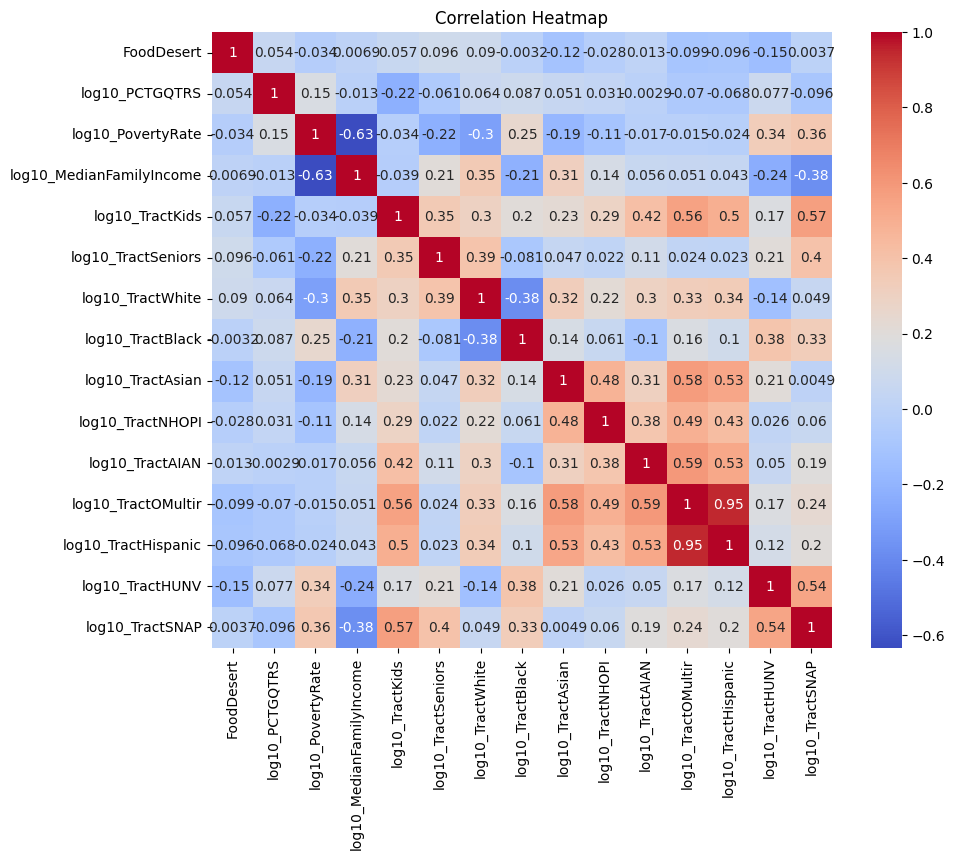

In [ ]:
# Compute the correlation matrix
correlation_matrix = li.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Add title and display the plot
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Divided urban data into the independent and dependent variables
X = li.drop(['FoodDesert'], axis = 1) # all independent
y = li['FoodDesert']  # Select the 'FoodDesert' column as the dependent variable
X.head()

,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
1,0.970347,1.276462,4.667472,2.783189,2.332438,2.948902,3.085647,0.778151,0.00000,0.778151,1.748188,1.880814,1.954243,2.195900
5,0.000000,1.354108,4.826224,3.003891,2.614897,3.439648,2.869818,1.000000,0.30103,1.041393,2.198657,2.247973,1.857332,2.352183
6,0.352183,1.498311,4.572604,2.836957,2.557507,3.368101,2.639486,1.146128,0.60206,1.079181,1.986772,1.995635,1.544068,2.592177
10,0.130334,1.374748,4.766428,2.875640,2.541579,3.347135,2.781037,0.602060,0.00000,1.278754,1.681241,1.602060,1.000000,2.167317
11,0.298853,1.399674,4.675182,2.875640,2.693727,3.158965,3.257918,0.477121,0.00000,1.176091,1.732394,1.602060,2.431364,2.363612


### Method selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the models you want to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=123)),
    ('Decision Tree', DecisionTreeClassifier(random_state=123)),
    ('Random Forest', RandomForestClassifier(random_state=123)),
    ('XGBoost', XGBClassifier(random_state=123)),
    ('LightGBM', LGBMClassifier(random_state=123)),
    ('SVM', SVC(random_state=123)),
    ('KNN', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance using common metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print()

Logistic Regression Results:
Accuracy: 0.676
Precision: 0.425
Recall: 0.126
F1 Score: 0.194

Decision Tree Results:
Accuracy: 0.630
Precision: 0.405
Recall: 0.411
F1 Score: 0.408

Random Forest Results:
Accuracy: 0.711
Precision: 0.586
Recall: 0.231
F1 Score: 0.331

XGBoost Results:
Accuracy: 0.703
Precision: 0.538
Recall: 0.300
F1 Score: 0.385

LightGBM Results:
Accuracy: 0.711
Precision: 0.584
Recall: 0.230
F1 Score: 0.331

SVM Results:
Accuracy: 0.694
Precision: 0.756
Recall: 0.018
F1 Score: 0.036

KNN Results:
Accuracy: 0.686
Precision: 0.489
Recall: 0.331
F1 Score: 0.395



> Random Forest

In [ ]:
# Print the model's performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_performance_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")


### Random Forest baseline model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the Random Forest model
rf_base= RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model to the training data
rf_base.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_base.predict(X_test)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred)


# from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
# Calculate the classification report
# report = classification_report(y_test, y_pred)
# print("Classification Report:")
# print(report)

# # Calculate the ROC-AUC score
# roc_auc = roc_auc_score(y_test, y_pred)
# print(f"ROC-AUC Score: {roc_auc:.3f}")

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# # Plot the ROC curve
# plot_roc_curve(rf, X_test, y_test) # use the input data instead of the predicted labels
# plt.show()

Accuracy: 0.711
Precision: 0.586
Recall: 0.231
F1 Score: 0.331


Accuracy: the baseline model has an accuracy of 0.636, which means that it correctly classified 63.6% of the test set samples.

Precision:the baseline model has a precision of 0.722, which means that when it predicted a positive label, it was correct 72.2% of the time.

Recall: the baseline model has a recall of 0.406, which means that it correctly identified only 40.6% of the actual positive samples.

Based on these results, it appears that the baseline model has room for improvement, particularly in terms of recall. A low recall score means that the model is failing to identify many of the areas that are actually food deserts.

### Class imbalance

In [ ]:
# Create a Random Forest Classifier with balanced class weights
rf_bal = RandomForestClassifier(class_weight='balanced', random_state=123)

# Fit the model on the training data
rf_bal.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_bal.predict(X_test)

# Print the model's performance metrics
print_performance_metrics(y_test, y_pred)


Accuracy: 0.709
Precision: 0.589
Recall: 0.203
F1 Score: 0.302


### Under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Create an instance of the RandomUnderSampler
undersampler = RandomUnderSampler()

# Verify the class distribution before undersampling
print("Class distribution before undersampling:")
print(y_train.value_counts())

# Apply undersampling to the training data
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Verify the class distribution after undersampling
print("Class distribution after undersampling:")
print(pd.Series(y_train_undersampled).value_counts())


Class distribution before undersampling:
0    16617
1     7349
Name: FoodDesert, dtype: int64
Class distribution after undersampling:
0    7349
1    7349
Name: FoodDesert, dtype: int64


####  New Baseline with undersampling

In [ ]:
# Train a new model on the undersampled data
rf_undersampled = RandomForestClassifier(random_state=123)
rf_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Evaluate the model on the original test data
y_pred_undersampled = rf_undersampled.predict(X_test)
print_performance_metrics(y_test, y_pred_undersampled)


Accuracy: 0.647
Precision: 0.456
Recall: 0.718
F1 Score: 0.557


#### Feature Selection

In [ ]:
# Store the initial feature scores
feature_scores = pd.Series(rf_undersampled.feature_importances_, index=X_train_undersampled.columns).sort_values(ascending=False)

# Initialize variables to track the best accuracy and the corresponding feature set
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1_score = 0
best_feature_set = []

# Create a list to store the dropped features and accuracies
dropped_features = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterate over each feature to drop
for feature in feature_scores.index:
    # Create a new feature set by dropping the current feature
    selected_features = [f for f in X_train_undersampled.columns if f not in [feature]]
    X_train_subset = X_train_undersampled[selected_features]
    X_test_subset = X_test[selected_features]

    # Train a new Random Forest model with the selected features
    rf = RandomForestClassifier(n_estimators=100, random_state=123)
    rf.fit(X_train_subset, y_train_undersampled)

    # Evaluate the model on the test set
    y_pred = rf.predict(X_test_subset)

    # Calculate performance metrics for the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Check if the current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_f1_score = f1
        best_feature_set = selected_features

    # Store the dropped feature and its corresponding accuracy
    dropped_features.append(feature)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)


In [ ]:
# Print the dropped features
dropped_features = [col for col in X_train.columns if col not in best_feature_set]

# Print the metrics and the corresponding feature set
print("Dropped features:", dropped_features)
print_performance_metrics(y_test, y_pred)
# print("Best feature set:", best_feature_set)

Dropped features: ['log10_PovertyRate']
Accuracy: 0.650
Precision: 0.459
Recall: 0.729
F1 Score: 0.563


### Hyperparameter tuning

In [ ]:
# evaluating the performance of a classification model on both training and testing datasets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred):.3f}")
        print("__________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred):.3f}")
        print("_________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### Randomized Search Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter search space
n_estimators = [int(x) for x in np.linspace(start=50, stop=500, num=50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 7, num=1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Create the base random forest classifier
rf_clf = RandomForestClassifier(random_state=123)

# Perform randomized search cross-validation
rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='accuracy',
    param_distributions=random_grid,
    n_iter=200,
    cv=5,
    verbose=1,
    random_state=123,
    n_jobs=-1
)

# Fit the randomized search CV on the undersampled data
rf_cv.fit(X_train_undersampled, y_train_undersampled)
rf_best_params = rf_cv.best_params_
print(f"Best parameters: {rf_best_params}")

# Create a random forest classifier with the best parameters
rf_clf_best = RandomForestClassifier(**rf_best_params, random_state=123)

# Fit the classifier on the undersampled data
rf_clf_best.fit(X_train_undersampled, y_train_undersampled)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 297, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


RandomForestClassifier(max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=297,
                       random_state=123)

In [ ]:
# Save the model to a file
from joblib import dump

dump(rf_clf_best, 'rf_li.pkl')

['rf_li.pkl']

In [ ]:
# Print the performance metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
y_pred5 = rf_clf_best.predict(X_test)
print_performance_metrics(y_test, y_pred5)

print_score(rf_clf_best, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf_best, X_train, y_train, X_test, y_test, train=False)

Accuracy: 0.648
Precision: 0.459
Recall: 0.757
F1 Score: 0.572
Train Result:
Accuracy Score: 0.826
__________________________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.983081     0.643534  0.826087      0.813308      0.878961
recall         0.762292     0.970336  0.826087      0.866314      0.826087
f1-score       0.858721     0.773847  0.826087      0.816284      0.832695
support    16617.000000  7349.000000  0.826087  23966.000000  23966.000000
__________________________________________________________
Confusion Matrix: 
 [[12667  3950]
 [  218  7131]]

Test Result:
Accuracy Score: 0.648
_________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.846023     0.459027  0.648198     0.652525      0.726088
recall        0.599274     0.757135  0.648198     0.678205      0.64819

> The rf_clf_best: accuracy 0.821.

>Best parameters:'n_estimators': 224, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True


### Validation

In [ ]:
# Print the performance metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
y_pred5 = rf_clf_best.predict(X_test)
print_performance_metrics(y_test, y_pred5)

print_score(rf_clf_best, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf_best, X_train, y_train, X_test, y_test, train=False)

Accuracy: 0.648
Precision: 0.459
Recall: 0.757
F1 Score: 0.572
Train Result:
Accuracy Score: 0.826
__________________________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.983081     0.643534  0.826087      0.813308      0.878961
recall         0.762292     0.970336  0.826087      0.866314      0.826087
f1-score       0.858721     0.773847  0.826087      0.816284      0.832695
support    16617.000000  7349.000000  0.826087  23966.000000  23966.000000
__________________________________________________________
Confusion Matrix: 
 [[12667  3950]
 [  218  7131]]

Test Result:
Accuracy Score: 0.648
_________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.846023     0.459027  0.648198     0.652525      0.726088
recall        0.599274     0.757135  0.648198     0.678205      0.64819

> The final model is rf_clf_best with accuracy of 0.821. not overfitting.


The accuracy score is 0.821, which means that the model classified 82.1% of the instances correctly.

The precision for class 1 is 0.816, which means that of all the instances predicted as class 1, 81.6% are actually class 1.

The recall for class 1 is 0.677, which means that of all the instances that are actually class 1, the model correctly identified 67.7% of them.

The F1-score is 0.740 which is not better than other model.


### Visualization

In [ ]:
# Load the saved model from a file
from joblib import load
fd_rf= load('rf_li.pkl')

Accuracy: 0.648
Precision: 0.459
Recall: 0.757
F1 Score: 0.572


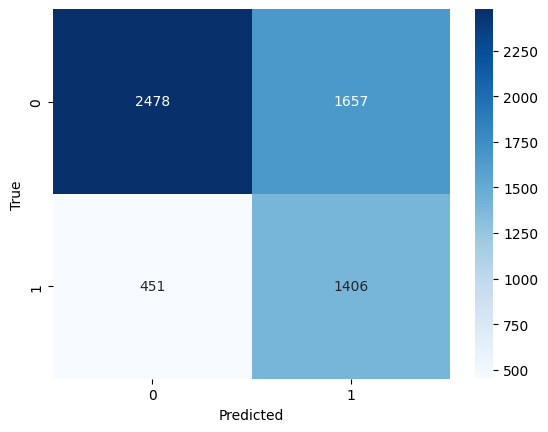

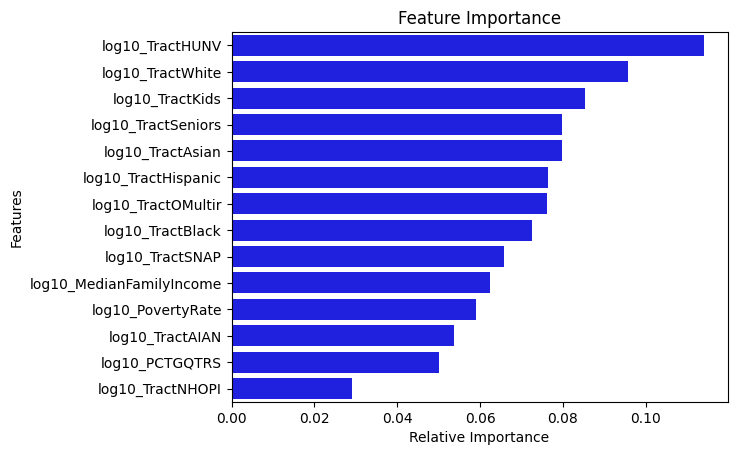

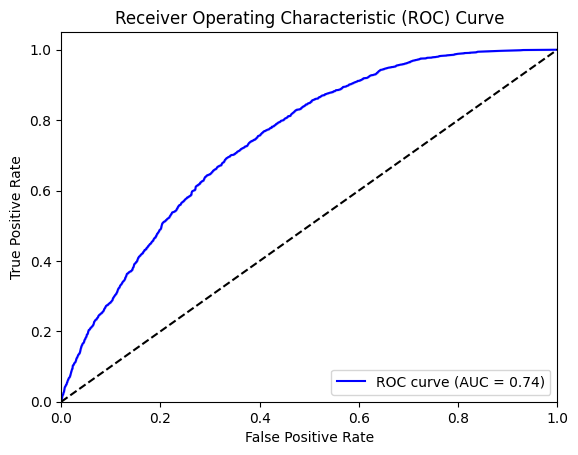

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Evaluate the model's performance using common metrics
y_pred = fd_rf.predict(X_test)
# Print the model's performance metrics
print_performance_metrics(y_test, y_pred)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance plot
importances = fd_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in fd_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

sns.barplot(x=importances[indices], y=X.columns[indices], color="b")
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# ROC curve
y_pred_prob = fd_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
sns.lineplot(x=fpr, y=tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


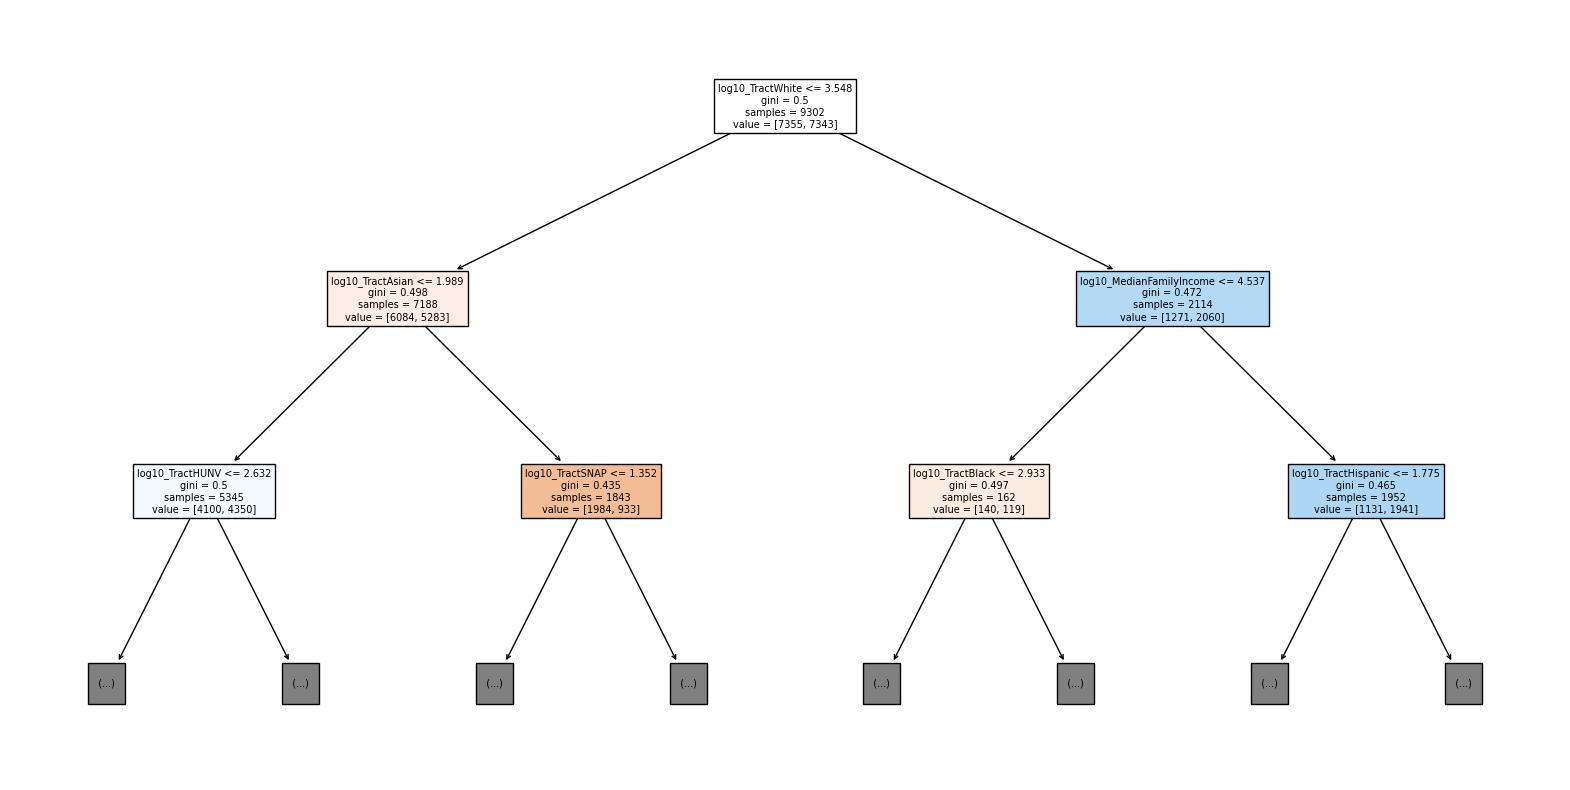

In [ ]:
from sklearn.tree import plot_tree

# Select one of the decision tree estimators from the random forest
tree = fd_rf.estimators_[11]

# Plot the selected decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns,  max_depth=2)
plt.show()